<a href="https://colab.research.google.com/github/ryukinako/stock/blob/main/%E6%A0%AA%E4%BE%A1%E5%8F%96%E5%BE%97_%E9%81%8E%E5%8E%BB%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%AB%E5%88%A9%E7%94%A8_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://myfrankblog.com/how_to_get_stock_price_with_python/#i-5

Pythonライブラリによる株価の取得

In [1]:
!pip install pandas-datareader

#必要なライブラリインポート

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data  as pdr #修正
from datetime import date
import yfinance as yf #追加
from sklearn import preprocessing

#株価の取得
df = 取得した株情報

In [3]:
yf.pdr_override()

start = datetime.date(2013,12,1)
end = datetime.date(2023,1,1)

df = pdr.get_data_yahoo('SONY',  start, end) #修正

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

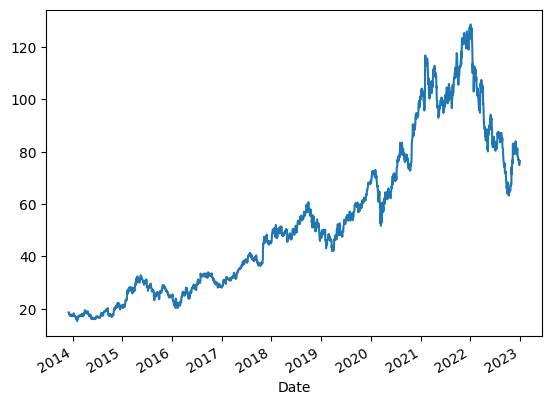

In [4]:
df["Close"].plot()

In [5]:
mm = preprocessing.MinMaxScaler() # 正規化用

price = np.array(df["Close"].to_list()).reshape(-1,1)
win_size = 5
span = 1 / 5 # 1spanの幅

sp_wins=[] # special windows :5step windows
wins = []
win_num = len(price) - win_size + 1 # 作成するwindowの数

In [6]:
def get_sp_win(price, win_num=win_num, win_size=win_size, span=span):
  # win_num個のwindowを作成
  for i in range(win_num):
    win = price[i:i+win_size] # priceからwindow_size個の要素を順に取り出す
    norm_win = mm.fit_transform(win) # windowの要素を正規化
    sp_win = []
    # print(f"norm_win: {norm_win}")

    # 正規化されたwindowの要素を各spanに割り振る
    for win_elm in norm_win:
      win_elm = float(win_elm)
      # print("--------")
      # print(f"win_elm: {win_elm}")

      for span_num in range(win_size): #
        if win_elm == 0:
          sp_win.append(1)
          break

        if win_elm > 1:
          sp_win.append(win_size)
          # print(f"append:{1}")
          break

        # print(f"span * span_num < win_elm <= span * (span_num+1): {span * span_num} < {win_elm} <= {span * (span_num+1)}:")
        # print(f"")
        if span * span_num < win_elm <= span * (span_num+1):
          sp_win.append(span_num + 1)
          # print(f"appendu:{span_num}")
    sp_wins.append(sp_win)
    # print(f"sp_win: {sp_win}")
    wins.append(norm_win)
  return sp_wins, wins

In [7]:
sp_wins, wins = get_sp_win(price, win_num, win_size, span)
# 作成した windowデータの整形
sp_wins = pd.DataFrame(sp_wins, columns=[str(x) for x in range(1,win_size+1)])

## 末尾の数の上がり幅を見る
# sp_wins["up_point"] = sp_wins.loc[:,"6"] - sp_wins.loc[:,"5"]
# sp_wins.query('up_point > 0')

# 重複したパターンを集約しカウント
aaa = sp_wins.groupby([str(x) for x in range(1,win_size+1)]).size()
aaa= aaa.reset_index()
aaa.rename(columns={0:"freq"}, inplace=True)
aaa

###重複した行カウント　https://teratail.com/questions/112906


,1,2,3,4,5,freq
0,1,1,1,1,5,10
1,1,1,1,2,5,15
2,1,1,1,3,5,11
3,1,1,1,4,5,15
4,1,1,1,5,2,2
...,...,...,...,...,...,...
815,5,5,5,1,5,1
816,5,5,5,2,1,14
817,5,5,5,3,1,7
818,5,5,5,4,1,11


In [8]:
aaa_2 = aaa

In [9]:
aaa_2 = aaa_2.groupby([str(x) for x in range(1,win_size)]).sum("freq").reset_index()
aaa_2.rename(columns={"freq":"pre_freq"}, inplace=True)
aaa_2

,1,2,3,4,5,pre_freq
0,1,1,1,1,5,10
1,1,1,1,2,5,15
2,1,1,1,3,5,11
3,1,1,1,4,5,15
4,1,1,1,5,14,27
...,...,...,...,...,...,...
435,5,5,5,1,11,13
436,5,5,5,2,1,14
437,5,5,5,3,1,7
438,5,5,5,4,1,11


In [10]:
aaa

,1,2,3,4,5,freq
0,1,1,1,1,5,10
1,1,1,1,2,5,15
2,1,1,1,3,5,11
3,1,1,1,4,5,15
4,1,1,1,5,2,2
...,...,...,...,...,...,...
815,5,5,5,1,5,1
816,5,5,5,2,1,14
817,5,5,5,3,1,7
818,5,5,5,4,1,11


In [11]:
aaa_2.drop("5", axis=1, inplace=True
           )

In [12]:
df1 = pd.merge(aaa, aaa_2, on=[str(x) for x in range(1, win_size)], how="inner")
df1

,1,2,3,4,5,freq,pre_freq
0,1,1,1,1,5,10,10
1,1,1,1,2,5,15,15
2,1,1,1,3,5,11,11
3,1,1,1,4,5,15,15
4,1,1,1,5,2,2,27
...,...,...,...,...,...,...,...
815,5,5,5,1,5,1,13
816,5,5,5,2,1,14,14
817,5,5,5,3,1,7,7
818,5,5,5,4,1,11,11


In [13]:
df1["pattern_prob"] =  df1["freq"] / df1["pre_freq"]
df1 = df1.reindex(columns = ["1","2","3","4","5","pattern_prob", "freq", "pre_freq"])

In [14]:
pd.options.display.precision = 2

In [15]:
# df2: increase value at pattern index 5→6
df2 = df1[df1["4"] < df1["5"]]

In [16]:
# df3 : increase value at pattern index 5→6 and pattern_prob > 0.5
df3 = df2.query('pattern_prob >= 0.8')

In [17]:
#　probability of value increase
all_pattern_num = df1.shape[0]
increase_pattern_num = df2.shape[0]
print("probability of value increase:",increase_pattern_num / all_pattern_num)

# 5→6の時@%の確率で値が増加するパターンが出現する確率
print("5→6の時80%以上の確率で値が増加するパターンが出現する確率:", df3.shape[0] / all_pattern_num)

probability of value increase: 0.424390243902439
5→6の時80%以上の確率で値が増加するパターンが出現する確率: 0.16097560975609757


###test

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

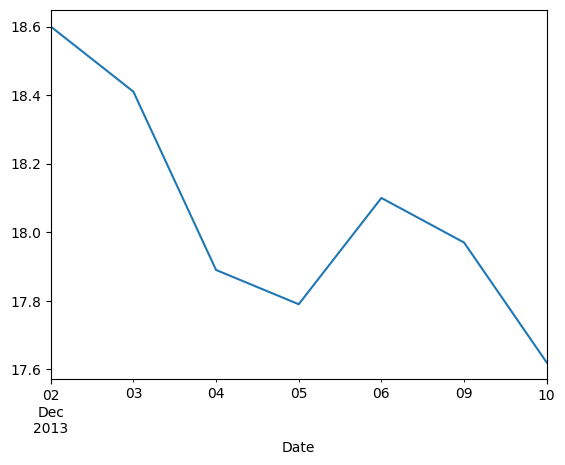

In [18]:
prob_period_start = datetime.date(2013,12,1)
prob_period_end = prob_period_start + datetime.timedelta(days=10)

# df = pdr.get_data_yahoo('^N225',  ago, today) #修正
df_prob_period = pdr.get_data_yahoo('SONY',  prob_period_start, prob_period_end) #修正
df_prob_period["Close"].plot()

In [19]:
df1= df1.set_axis(["pat1", "pat2", "pat3", "pat4", "pat5", "pat_prob", "freq", "pre_freq"],axis=1)
df1

,pat1,pat2,pat3,pat4,pat5,pat_prob,freq,pre_freq
0,1,1,1,1,5,1.00,10,10
1,1,1,1,2,5,1.00,15,15
2,1,1,1,3,5,1.00,11,11
3,1,1,1,4,5,1.00,15,15
4,1,1,1,5,2,0.07,2,27
...,...,...,...,...,...,...,...,...
815,5,5,5,1,5,0.08,1,13
816,5,5,5,2,1,1.00,14,14
817,5,5,5,3,1,1.00,7,7
818,5,5,5,4,1,1.00,11,11


#予測

In [20]:
prob_pat = [1,2,4,5]
df1.query('pat1 == @prob_pat[0] and pat2==@prob_pat[1] and pat3==@prob_pat[2] and pat4==@prob_pat[3]')

,pat1,pat2,pat3,pat4,pat5,pat_prob,freq,pre_freq
75,1,2,4,5,2,0.07,1,15
76,1,2,4,5,5,0.93,14,15


In [21]:
x_start = datetime.date(2023,1,1)
x_end = datetime.date(2023,7,1)

x_df = pdr.get_data_yahoo('SONY',  x_start, x_end) #修正

[*********************100%***********************]  1 of 1 completed


In [22]:
def get_sp_x(x, win_size=win_size, span=span):

  norm_x = mm.fit_transform(x) # windowの要素を正規化
  sp_x = []

  # 正規化されたwindowの要素を各spanに割り振る
  for x_elm in norm_x:
    x_elm = float(x_elm)

    for span_num in range(win_size): #
      if x_elm == 0:
        sp_x.append(1)
        break

      if x_elm > 1:
        sp_x.append(win_size)
        break

      # print(f"span * span_num < x_elm <= span * (span_num+1): {span * span_num} < {x_elm} <= {span * (span_num+1)}:")
      # print(f"")
      if span * span_num < x_elm <= span * (span_num+1):
        sp_x.append(span_num + 1)
        # print(f"appendu:{span_num}")
  return sp_x

In [23]:
df_x = np.array(x_df["Close"].to_list()).reshape(-1,1)

s = 33
e = s+5
xt = df_x[s:e]
print(f"xt:{xt}")

sp_xt = get_sp_x(xt)
print(f"sp_xt: {sp_xt}")

x = df_x[s:e-1]
print(f"x:{x}")

sp_x = get_sp_x(x)
print(f"sp_x: {sp_x}")

prob_pat = sp_x
pred_items = df1.query('pat1 == @prob_pat[0] and pat2==@prob_pat[1] and pat3==@prob_pat[2] and pat4==@prob_pat[3]')
pred_items

In [61]:
from numpy.core.multiarray import empty
# 取引成績の計算
def get_win_rate(df_x):
  win_rates = []
  for i in range(len(df_x)-5):
    buy_flg = 0
    s = i
    e = s+5
    xt = df_x[s:e]
    sp_xt = get_sp_x(xt) # price ➜　spanに割り振り
    x = df_x[s:e-1]
    sp_x = get_sp_x(x)
    prob_pat = sp_x
    pred_items = df1.query('pat1 == @prob_pat[0] and pat2==@prob_pat[1] and pat3==@prob_pat[2] and pat4==@prob_pat[3]')
    if not pred_items.empty:
      pred_items_sort = pred_items.sort_values('pat_prob')
      max_prob_pat = pred_items_sort[-1:]
      if max_prob_pat.pat_prob.item() > 0.6:
        if max_prob_pat.pat4.item() < max_prob_pat.pat5.item():
          buy_flg = 1
          win_rate = xt[-1,0] / x[-1,0]
          win_rates.append(win_rate)
        else:
          buy_flg = 0
          win_rates.append(0)
      else:
        buy_flg = 0
        win_rates.append(0)
    else:win_rates.append(0)
  return win_rates

In [59]:
get_win_rate(df_x)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0166049972236124,
 0,
 1.0014552474057241,
 1.0010060805746284,
 0,
 0,
 0,
 0,
 0,
 0.9966822005260081,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.9801029432460215,
 0,
 0,
 0,
 0,
 0,
 1.0094921566615502,
 0.9916166546741604,
 0.9898320644115107,
 0.9905355528554841,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0045069366517887,
 0,
 0,
 0.9912626098329532,
 0,
 0,
 0,
 0,
 0.9909968346992699,
 1.0158712449491587,
 0,
 0,
 0,
 1.015794018237917,
 0,
 0,
 0,
 0,
 0,
 1.016096388183864,
 0,
 0,
 0,
 0.9730533064084492,
 0,
 0,
 0,
 0,
 0,
 1.0315902541117716,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [60]:
sum(get_win_rate(df_x))/17

1.0009705582737574

# 得られた5つの点のパターンを多い順にソート

In [ ]:
import collections

freq = collections.Counter(sp_wins)
freq_sort = freq.most_common()
freq_sort[:20]

TypeError: ignored

In [ ]:
len(price)